In [4]:
import torch
from models.unet import UNet
from data.data_module import DataModule
from losses.segmentation_loss import SegmentationLossFunction
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = UNet().to(device)

(600, 3)


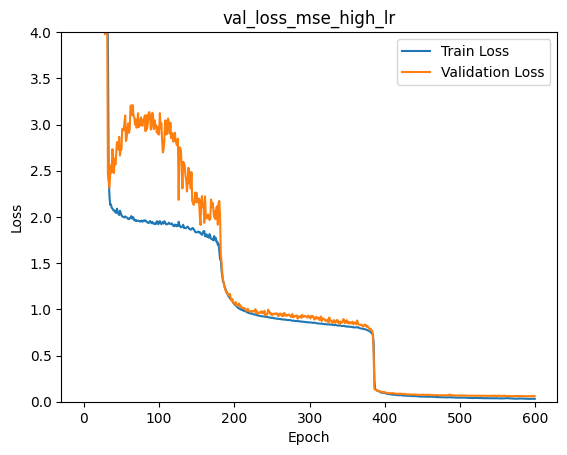

(600, 3)


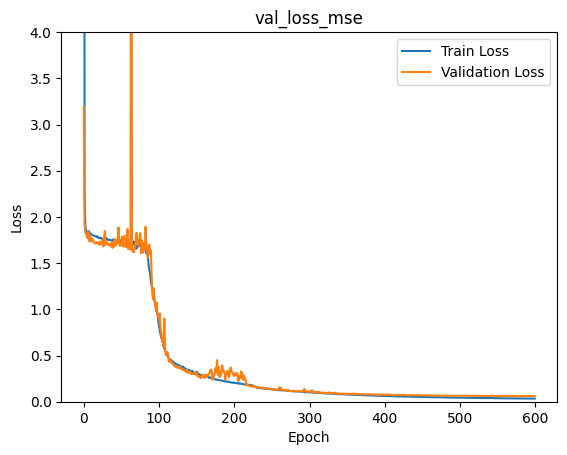

(604, 3)


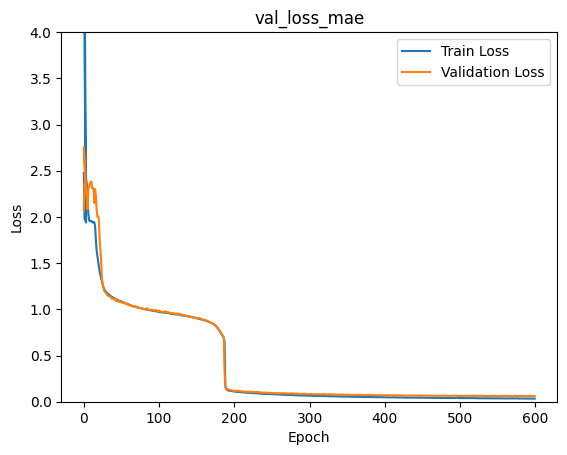

(611, 3)


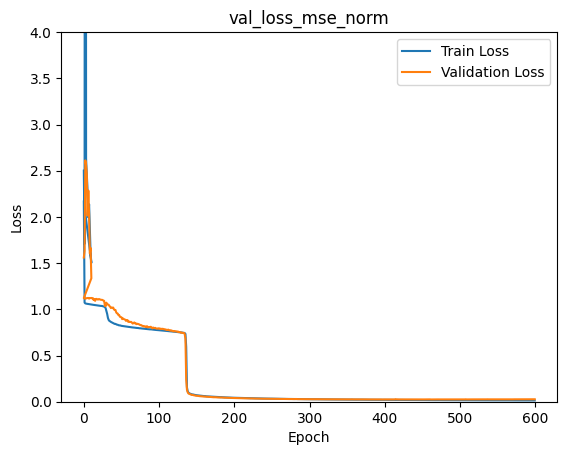

(600, 3)


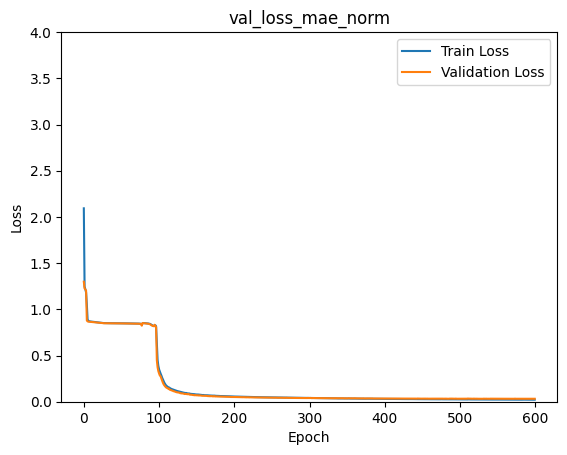

In [33]:
def plot_loss_curve(loss_file, xlim=None, ylim=None, show_title=True, title=None):
    loss = np.loadtxt(loss_file, delimiter=',')
    print(loss.shape)
    plt.plot(loss[:, 0], loss[:, 1], label='Train Loss')
    plt.plot(loss[:, 0], loss[:, 2], label='Validation Loss')
    
    # x축 범위 설정
    if xlim is not None:
        plt.xlim(xlim)
    
    # y축 범위 설정
    if ylim is not None:
        plt.ylim(ylim)

            # 제목 설정
    if show_title:
        if title is None:
            # 파일명에서 .txt를 제외한 부분을 제목으로 사용
            default_title = loss_file.rsplit('.txt', 1)[0]
            plt.title(default_title)
        else:
            plt.title(title)

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# 사용 예시:
plot_loss_curve('val_loss_mse_high_lr.txt', ylim=(0, 4.0))
plot_loss_curve('val_loss_mse.txt', ylim=(0, 4.0))
plot_loss_curve('val_loss_mae.txt', ylim=(0, 4.0))
plot_loss_curve('val_loss_mse_norm.txt', ylim=(0, 4.0))
plot_loss_curve('val_loss_mae_norm.txt', ylim=(0, 4.0))




In [16]:
# DataModule 인스턴스 생성
data_module = DataModule('./', 20, device)

# setup 메소드를 호출하여 검증 데이터 로드
data_module.setup(val_file=('s_val.npy', 'e_val.npy'))

val_loader = data_module.val_loader

/tmp/ipykernel_206333/830252190.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'{model_path}/model{i}.pth'))


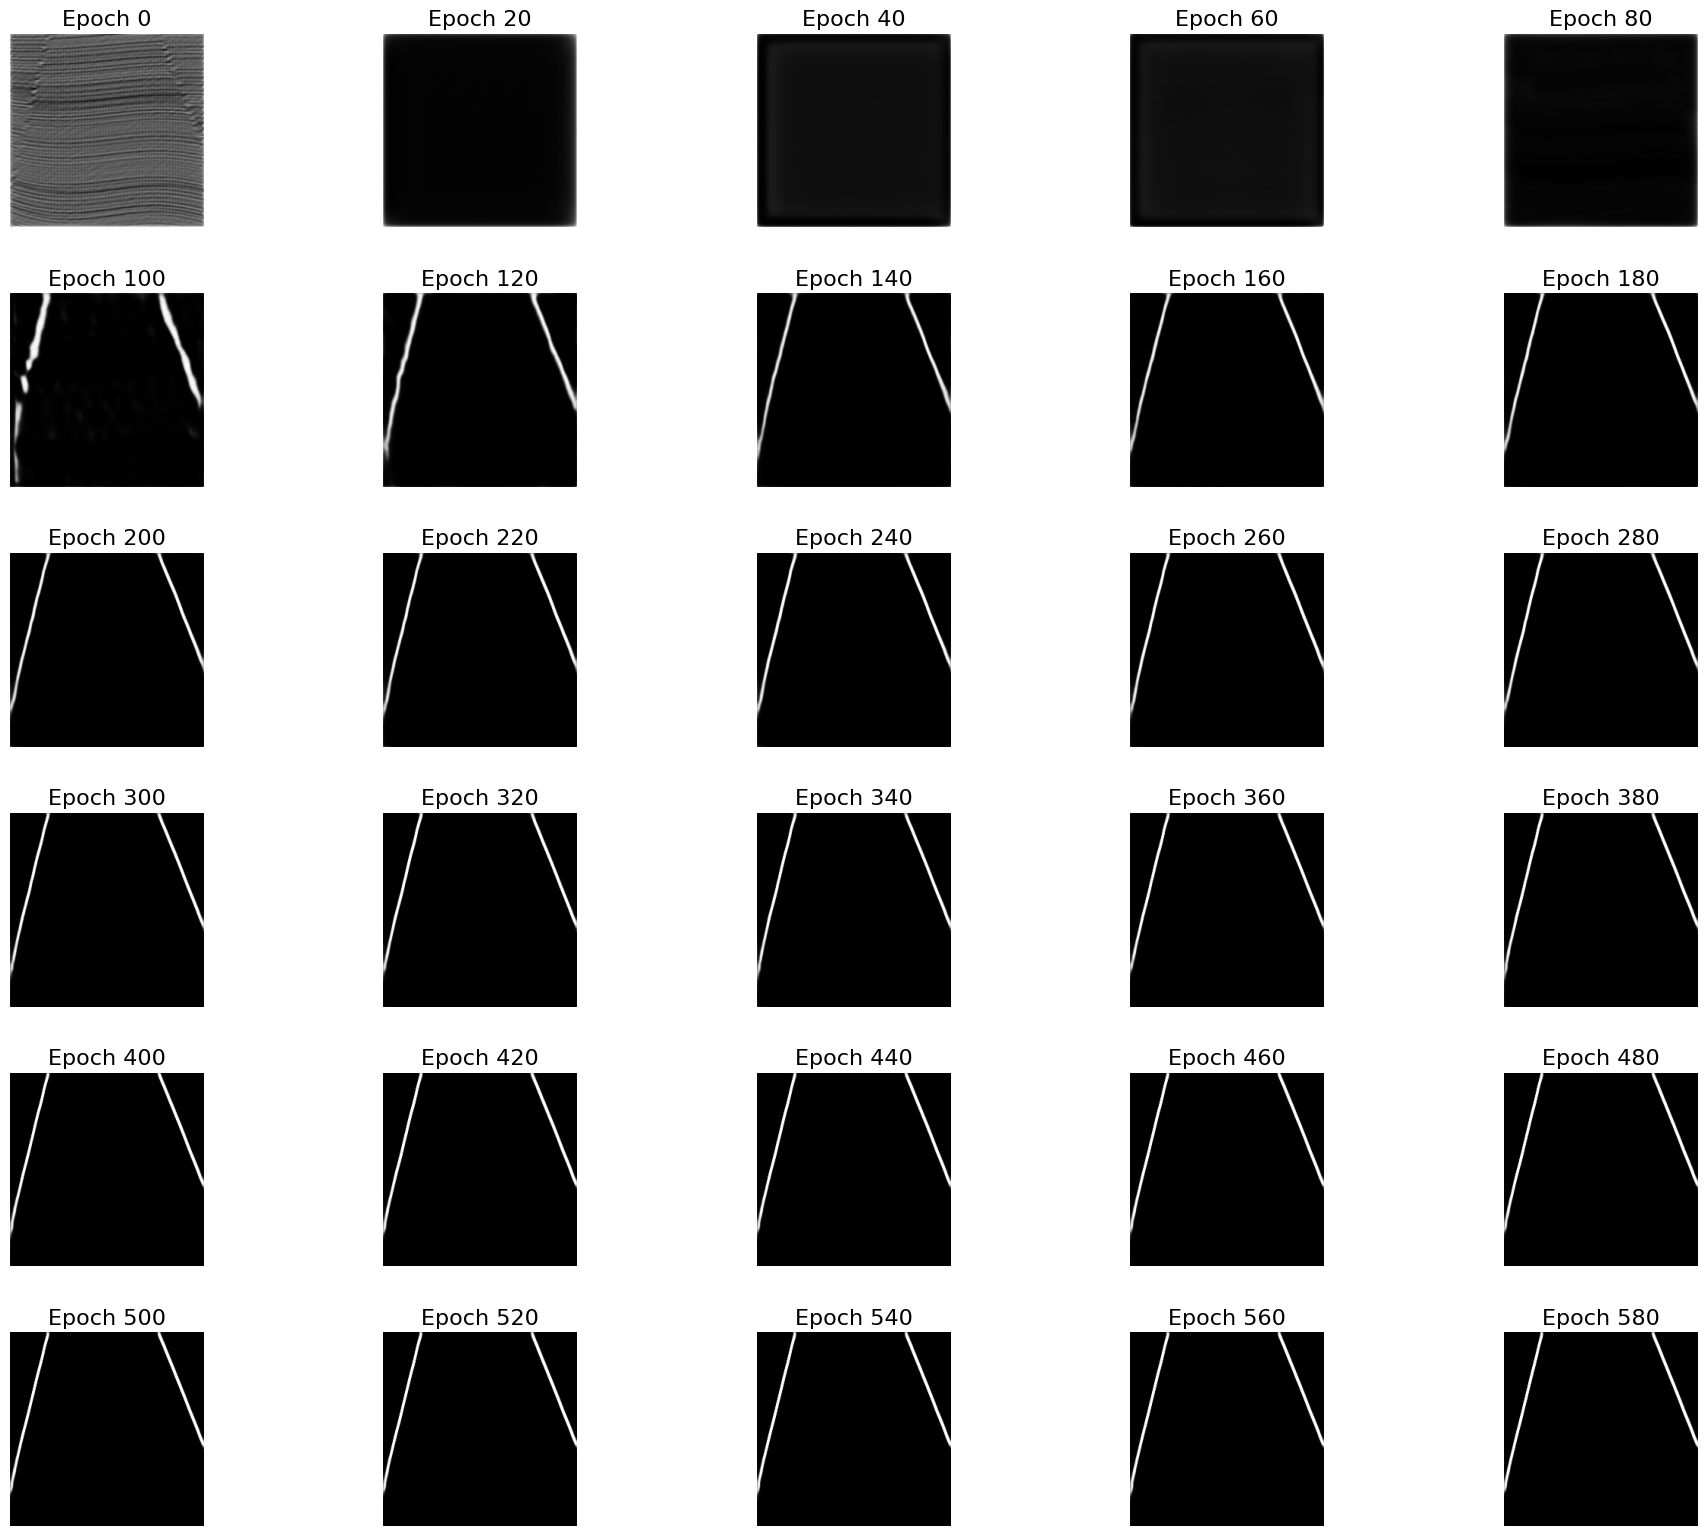

In [31]:
def visualize_model_outputs(max_epochs, epoch_step, model_path, data_index=0, rows=6, cols=5):
    """
    학습된 모델의 출력을 시각화하는 함수
    
    Args:
        max_epochs (int): 최대 에폭 수
        epoch_step (int): 건너뛸 에폭 간격
        model_path (str): 모델 파일이 저장된 경로
        data_index (int): 검증 데이터에서 확인할 데이터의 인덱스
        rows (int): 서브플롯의 행 수
        cols (int): 서브플롯의 열 수
    """
    plt.figure(figsize=(20, 16))
        
    # 먼저 원하는 데이터를 가져옵니다
    data_iter = iter(val_loader)
    data = None
    for i in range(data_index + 1):  # data_index + 1 만큼 반복
        data = next(data_iter)
    
    inputs, labels = data  # 선택된 데이터를 사용
    
    for i in range(0, max_epochs, epoch_step):
        model.load_state_dict(torch.load(f'{model_path}/model{i}.pth'))
        model.eval()
        
        with torch.no_grad():
            outputs = model(inputs)
            
            plt.subplot(rows, cols, (i//epoch_step) + 1)
            plt.imshow(outputs[0].cpu().squeeze().T, cmap='gray')
            plt.title(f'Epoch {i}', fontsize=16)
            plt.axis('off')
    
    plt.tight_layout(pad=3.0)
    plt.show()

max_epochs = 600
epoch_step = 20
model_path = 'trained_models_mae_norm'
data_index = 6
rows = 6
cols = 5

visualize_model_outputs(max_epochs, epoch_step, model_path, data_index, rows, cols)
